# Logitische Regression (50 Punkte)

Ihre Aufgabe in diesem Notebook ist die Umsetzung einer **univariate** logistische Regression, d.h. folgendes Modell:

$$ Input: \vec{x}^T = (x_1, x_2, ... , x_n) $$ 
$$ Output\: h\: des\: Neurons: h = \sigma(\sum_{i=1}^{n} w_i x_i + b) = \sigma( \vec{x}^T \vec{w} + b)$$ 
$$ Logistische\: Funktion: \sigma(z) = \dfrac{1}{(1+e^{-z})}$$
$$ Neuronengewichte: w_i$$
$$ Bias: b$$

Erweitern Sie das Notebook unter folgenden Aspekten: 
- (15) Implementieren Sie das Modell mit Tensorflow und den gegebenen Daten.
- (25) Optimieren Sie die Kosten (cross-entropy und L2-Regularisierung) mit Tensorflow, verwenden Sie hierzu den tf.train.GradientDescentOptimizer. 
$$ J(\vec{w},b) = - \dfrac{1}{m}(y log(h_{\vec{w}, b}(\vec{x}) + (1 - y) log ( 1 - h_{\vec{w}, b} (\vec{x} )) + \lambda \sum_i w_i^2 $$
Zeichen Sie einen Plot des den Fortschittes (Abnahme der Kosten über den Iterationen).

<img src="ak1163051/pics/logreg_learning_rate.png", width=400>

- (5) Geben Sie die gefundenen Parameter aus (einfaches print)
- (5) Zeichen Sie die Daten zusammen mit der Entscheidungsgrenze.

<img src="ak1163051/pics/logreg_decision_boundary.png", width=400>

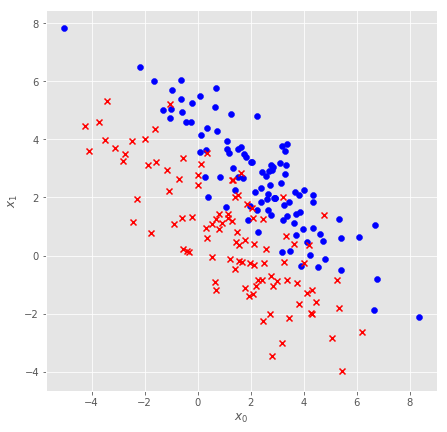

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
plt.style.use('ggplot')

# class 0:
# covariance matrix and mean
cov0 = np.array([[5,-4],[-4,4]])
mean0 = np.array([2.,3])
# number of data points
m0 = 100

# class 1
# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
m1 = 100

# generate m0 gaussian distributed data points with
# mean0 and cov0.
r0 = np.random.multivariate_normal(mean0, cov0, m0)
r1 = np.random.multivariate_normal(mean1, cov1, m1)

def plot_data(r0, r1):
    plt.figure(figsize=(7.,7.))
    plt.scatter(r0[...,0], r0[...,1], c='b', marker='o', label="Klasse 0")
    plt.scatter(r1[...,0], r1[...,1], c='r', marker='x', label="Klasse 1")
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.show()
    
plot_data(r0,r1)    

In [2]:
X_data = np.concatenate((r0,r1))
Y_data = np.zeros(len(r0)+len(r1))
Y_data[:len(r0)] = 1

In [3]:
import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.truncated_normal([2, 1], stddev=0.1))
b = tf.Variable(tf.zeros([1]))

sigma = tf.nn.softmax(tf.matmul(x, W) + b)

init = tf.initialize_all_variables()
sess.run(init)

y_ = tf.sigmoid(tf.matmul(x, W) + b)

/home/sebsch/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Instructions for updating:
Use `tf.global_variables_initializer` instead.


# Loss Function

In [4]:
cross_entropy = -1/(m0+m1)*tf.reduce_sum(y*tf.log(y_[:,0]) + (1.-y)*tf.log(1.-y_[:,0]))
l2_reg = tf.reduce_sum(tf.square(W))

lambda_ = 0.002
cost_function = cross_entropy + lambda_ * l2_reg

# Loss reduction

In [5]:
global_step = tf.Variable(0, trainable=False)
starter_alpha = 0.001

# Anpassen des Wertes für alpha
# https://www.tensorflow.org/api_docs/python/tf/train/exponential_decay
alpha = tf.train.exponential_decay(starter_alpha, global_step, 100, 0.96, staircase=True)

optimizer = tf.train.GradientDescentOptimizer(alpha)
train_step = optimizer.minimize(cost_function, global_step=global_step)

sess.run(tf.initialize_all_variables())

In [6]:
epochs = 10000

def update(feed_dict):
    c = cross_entropy.eval(feed_dict=feed_dict)
    train_step.run(feed_dict)
    return c

In [7]:
# Gradientenabstieg
costs = np.array([ update({x: X_data, y: Y_data}) for _ in tqdm(range(epochs)) ])

100%|██████████| 10000/10000 [00:07<00:00, 1351.01it/s]


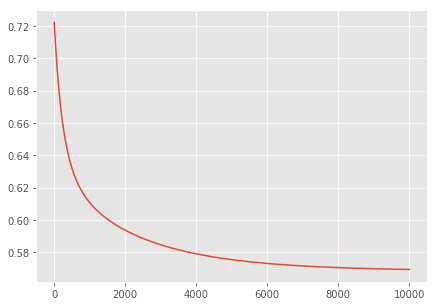

In [8]:
fig, ax = plt.subplots()
fig.set_figwidth(7)
fig.set_figheight(5)
_ = ax.plot(range(epochs), costs)

In [9]:
xs = x.eval({x: X_data, y: Y_data})

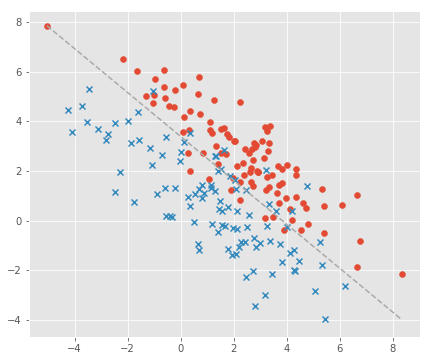

In [13]:
def plot_descicion_border(x0, x1):
    fig, ax = plt.subplots()
    fig.set_figwidth(7)
    fig.set_figheight(6)
    ax.scatter(r0[...,0], r0[...,1], marker='o', label="Klasse 0")
    ax.scatter(r1[...,0], r1[...,1], marker='x', label="Klasse 1")
    ax.plot(x0, x1, '--', c='darkgrey')

x0 = xs[:,0].min(), xs[:,0].max()
x1 = xs[:,1].max(), xs[:,1].min()

plot_descicion_border(x0,x1)
